Score: 0.99
Score: 1.00
Score: 0.82
Score: 0.78


"\nlbc2 = LogisticBinaryClassification()\nlbc2.read_data('data/diabetes.csv')\nlbc2.format_data()\nlbc2.train()    \n"

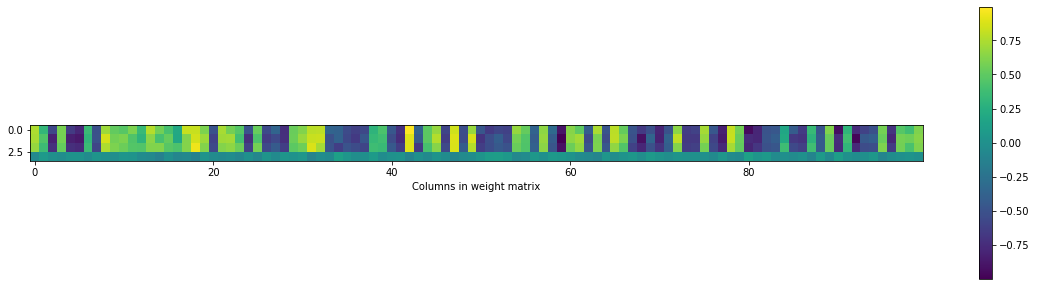

In [46]:
import csv
from sklearn.model_selection import train_test_split
import random
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


# Assumes that the csv file has no header.
class LogisticBinaryClassification:
    """Class that automates Logistic regression"""
    """Assumes the class is at the very end of the data."""
    
    def __init__(self):        
        self.negative_class = []
        self.positive_class = []   
        
        self.dataset = []
        self.X_data = []
        self.Y_data = [] 
        
        self.lgr = None
        
    def read_data(self, path):
        with open(path, 'r', encoding='utf-8') as csv_file:
            
            csv_reader = csv.reader(csv_file)
            
            for row in csv_reader:
                if row[-1] == '0':
                    self.negative_class.append(row)
                else:
                    self.positive_class.append(row)
         
        # Now that we have got our data we can convert it get the number of groups
        # Shuffle the groups
        random.shuffle(self.negative_class)
        random.shuffle(self.positive_class)
        
        
        # Now we can collate the dataset.
        size_dataset = min(len(self.negative_class), len(self.positive_class))
        self.dataset = self.negative_class[:size_dataset] + self.positive_class[:size_dataset]       

        
    def format_data(self):
        """Formats the dataset into X and Y numpy arrays"""
        self.X_data = np.array([row[:-1] for row in self.dataset], dtype='float')
        self.Y_data = np.array([row[-1] for row in self.dataset], dtype='int')
        
    def train(self):
        """Makes a prediction based on the data in the class"""
        X_train, X_test, y_train, y_test = train_test_split(self.X_data, self.Y_data)
        
        self.lgr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
        
        mean_train = X_train.mean(axis=0)
        
        std_train = X_train.std(axis=0)
        
        X_train_scaled = (X_train - mean_train) / std_train
        
        X_test_scaled = (X_test - mean_train) / std_train
        
        self.neural_network = MLPClassifier(activation='logistic', 
                                            max_iter=1000).fit(X_train_scaled, y_train)        
        
        print("Score: {:.2f}".format(self.lgr.score(X_train, y_train)))
        print("Score: {:.2f}".format(self.lgr.score(X_test, y_test)))
                
        print("Score: {:.2f}".format(self.neural_network.score(X_train, y_train)))
        print("Score: {:.2f}".format(self.neural_network.score(X_test, y_test))) 
        
        plt.figure(figsize=(20,5))
        plt.imshow(self.neural_network.coefs_[0], interpolation='none', cmap='viridis')
        plt.xlabel("Columns in weight matrix")
        plt.colorbar()
        
        
    def predict(self, data):
        """Predicts the outcome based on data returns the class."""
        features = np.array(data, dtype='float').reshape((-1,1)).T
        return self.lgr.predict(features)[0]      

    
lbc = LogisticBinaryClassification()
lbc.read_data('data/data_banknote_authentication.csv')
lbc.format_data()               
lbc.train()
lbc.predict([1.6426, 3.0149, 0.22849, -0.147])

"""
lbc2 = LogisticBinaryClassification()
lbc2.read_data('data/diabetes.csv')
lbc2.format_data()
lbc2.train()    
"""    
                
        
        
        
